In [216]:
## Imagine you flip a fair coin 100 times. It gives a sequence of heads (H) and tails (T). 
## For each HH in the sequence of flips, Ana gets a point. For each HT, Carlos does.
## For example: for the sequence THHHT, Ana gets 2 points and Carlos gets 1 point. 

## Who is most likely to win?

## Let's discover it!

In [217]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt 

def get_array(n:int):
    flip_times = binom.rvs(1, 0.5, size=n)
    dic = {0: "H", 1:"T"}
    flip_results = [dic[i] for i in flip_times]
    flip_results_array = np.array(flip_results)
    
    count_ana, count_carlos = 0, 0

    for i in range(1, len(flip_results_array)):
        if flip_results_array[i-1] + flip_results_array[i] == "HH":
            count_ana += 1
        elif flip_results_array[i-1] + flip_results_array[i] == "HT":
            count_carlos += 1
    
    return count_ana, count_carlos, n

def run_experiments(times:int, n:int):
    np.random.seed(10)
    results = []
    for t in range(times):
        results.append(get_array(n))
    
    return pd.DataFrame(results, index=range(1,times+1) , columns=["ana_points", "carlos_points", "n"])

In [218]:
run_experiments(1,100)

,ana_points,carlos_points,n
1,27,24,100


In [219]:
df = run_experiments(1000,100)
df["winner"] = df.apply(lambda row: "Ana" if row["ana_points"] > row["carlos_points"] else ("Carlos" if row["ana_points"] < row["carlos_points"] else "Draw"), axis=1)
df.head()


,ana_points,carlos_points,n,winner
1,27,24,100,Ana
2,27,23,100,Ana
3,23,25,100,Carlos
4,22,25,100,Carlos
5,20,21,100,Carlos


In [220]:
winners = df["winner"].value_counts().sort_index(ascending=True)
print(winners)


winner
Ana       445
Carlos    489
Draw       66
Name: count, dtype: int64


In [221]:
prob_carlos_wins=winners[1]/(winners.sum())
prob_ana_wins=winners[0]/(winners.sum())

prob_list = [prob_ana_wins, prob_carlos_wins, 1-prob_carlos_wins-prob_ana_wins]

print(prob_list)

[0.445, 0.489, 0.066]


In [222]:
prob = pd.DataFrame({"times": winners, "prob": prob_list})
print(prob)

        times   prob
winner              
Ana       445  0.445
Carlos    489  0.489
Draw       66  0.066


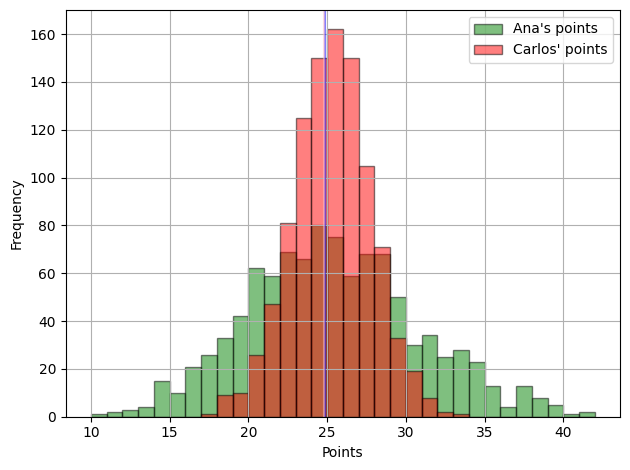

In [223]:
ana=df["ana_points"]
carlos=df["carlos_points"]

bins=range(min(ana.min(), carlos.min()), max(ana.max(), carlos.max()), 1)

ana.hist(bins=bins, alpha=0.5, color="green", edgecolor="black", label="Ana's points")
carlos.hist(bins=bins, alpha=0.5, color="red", edgecolor="black", label="Carlos' points")
plt.axvline(np.nanmean(ana), color="blue", alpha=0.5)
plt.axvline(np.nanmean(carlos), color="pink", alpha=0.5)

plt.xlabel("Points")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()

plt.show()

In [224]:
df.describe().round(2)

,ana_points,carlos_points,n
count,1000.00,1000.00,1000.0
mean,24.89,24.78,100.0
std,5.49,2.50,0.0
min,10.00,17.00,100.0
25%,21.00,23.00,100.0
50%,25.00,25.00,100.0
75%,28.00,26.00,100.0
max,43.00,33.00,100.0
